In [1]:
#pip install h5py nibabel pandas glob2 regex
import os
import sys
import numpy as np
import nibabel as nib
import h5py
import time
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm
from itertools import product
import scipy
import torch
import torch.nn as nn
os.environ["CUDA_VISIBLE_DEVICES"]= '1' #, this way I would choose GPU 3 to do the work
import scipy.io as sio

In [3]:
Vol = 5

with h5py.File(f'AllMaps_vanilla_Vol{Vol}.mat', 'r') as f:
    print(list(f.keys()))  # Zeigt dir die verfügbaren Variablennamen
    data = f['AllMaps']  # Beispiel: lade Dataset
    metabos = data['Metabos']
    Title = metabos['Title'][:]
    title_refs = metabos['Title']
    MetabMaps = metabos['Normal'][:]
    #print(list(data.keys()))
    #print(list(metabos.keys()))
    titles = []
    for ref in title_refs[0]:  # assuming shape (1, N)
        dset = f[ref]
        title = dset[:].tobytes().decode('utf-16-le')  # ← das ist der Trick
        titles.append(title)

with h5py.File(f'AllMaps_Hauke_Vol{Vol}.mat', 'r') as f:
    print(list(f.keys()))  # Zeigt dir die verfügbaren Variablennamen
    data = f['AllMaps']  # Beispiel: lade Dataset
    metabos = data['Metabos']
    Title = metabos['Title'][:]
    title_refs = metabos['Title']
    MetabMaps_Hauke = metabos['Normal'][:]
    #print(list(data.keys()))
    #print(list(metabos.keys()))
    titles = []
    for ref in title_refs[0]:  # assuming shape (1, N)
        dset = f[ref]
        title = dset[:].tobytes().decode('utf-16-le')  # ← das ist der Trick
        titles.append(title)
    #print(titles)

with h5py.File(f'AllMaps_Paul_Vol{Vol}.mat', 'r') as f:
    print(list(f.keys()))  # Zeigt dir die verfügbaren Variablennamen
    data = f['AllMaps']  # Beispiel: lade Dataset
    metabos = data['Metabos']
    Title = metabos['Title'][:]
    title_refs = metabos['Title']
    MetabMaps_Paul = metabos['Normal'][:]
    #print(list(data.keys()))
    #print(list(metabos.keys()))
    titles = []
    for ref in title_refs[0]:  # assuming shape (1, N)
        dset = f[ref]
        title = dset[:].tobytes().decode('utf-16-le')  # ← das ist der Trick
        titles.append(title)

['#refs#', 'AllMaps', 'Par', 'WaterRefState', 'out_dir', 'tmp_dir']
['#refs#', 'AllMaps', 'Par', 'WaterRefState', 'out_dir', 'tmp_dir']
['#refs#', 'AllMaps', 'Par', 'WaterRefState', 'out_dir', 'tmp_dir']


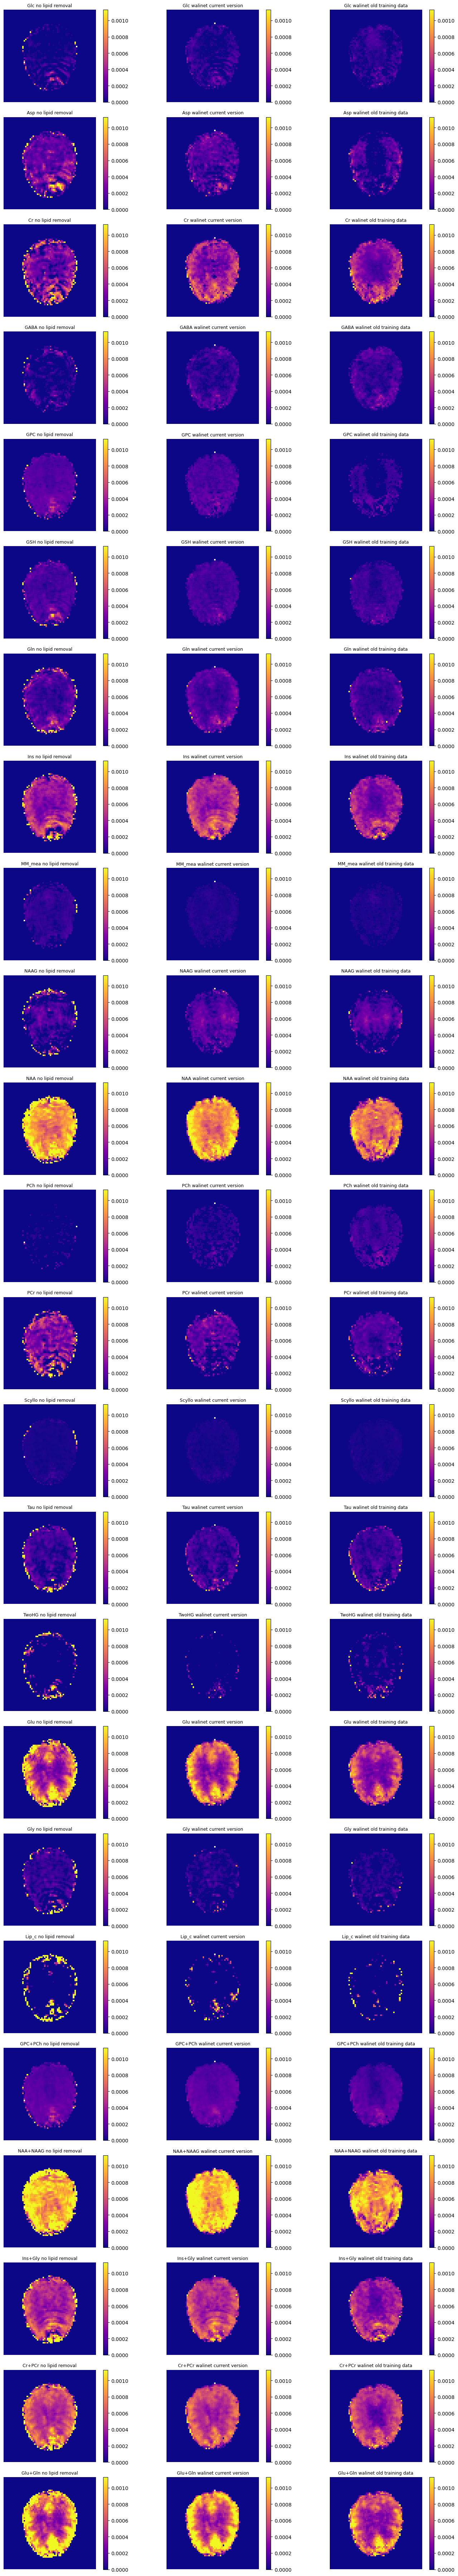

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these are your 3 sets of maps:
maps_vanilla       = MetabMaps[:, 17, :, :]
maps_walinet_paul  = MetabMaps_Paul[:, 17, :, :]
maps_walinet_hauke = MetabMaps_Hauke[:, 17, :, :]  # adjust source as needed

# Compute common vmin/vmax from the 1st to 99th percentile of all data
combined = np.concatenate([
    maps_vanilla.flatten(),
    maps_walinet_paul.flatten(),
    maps_walinet_hauke.flatten()
])
finite = combined[np.isfinite(combined)]
vmin, vmax = np.nanpercentile(finite, [1, 99])

# Prepare the figure with 3 columns
# Prepare the figure with 3 columns
n = len(titles)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(15, n * 3))

for i, title in enumerate(titles):
    # Vanilla
    im = axes[i, 0].imshow(maps_vanilla[i], cmap='plasma', vmin=vmin, vmax=vmax, origin='lower')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"{title} no lipid removal", fontsize=9)
    fig.colorbar(im, ax=axes[i, 0], fraction=0.046, pad=0.04)

    # Walinet-Hauke
    im = axes[i, 1].imshow(maps_walinet_hauke[i], cmap='plasma', vmin=vmin, vmax=vmax, origin='lower')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"{title} walinet current version", fontsize=9)
    fig.colorbar(im, ax=axes[i, 1], fraction=0.046, pad=0.04)

    # Walinet-Paul
    im = axes[i, 2].imshow(maps_walinet_paul[i], cmap='plasma', vmin=vmin, vmax=vmax, origin='lower')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f"{title} walinet old training data", fontsize=9)
    fig.colorbar(im, ax=axes[i, 2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()




